In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.cluster import KMeans
import seaborn as sns


Collecting the data and parsing it to a pandas dataframe

In [3]:
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx'
urllib.request.urlretrieve(url, 'cdata.xlsx')

('cdata.xlsx', <http.client.HTTPMessage at 0x1badc6ec308>)

In [4]:
world=pd.read_excel('cdata.xlsx')

Cleaning the data


In [5]:
world.iloc[:,1:5]=world.iloc[:,1:5].astype(int)
world.iloc[:,9]=world.iloc[:,9].replace('',0)
world.continentExp=world.continentExp.astype(str)
world.dateRep=pd.to_datetime(world.dateRep,format='%d/%m/%Y')
world.set_index('dateRep',inplace=True)
world.deaths=world.deaths.astype(int)
world=world[world.countriesAndTerritories!='Cases_on_an_international_conveyance_Japan']


Listing the available continents




In [6]:

world['continentExp'].unique()


array(['Asia', 'Europe', 'Africa', 'America', 'Oceania'], dtype=object)

So we have Asia, Europe, Africa, America, and Oceania (mostly relates to Australia and neighbouring islands) and others.

In [7]:
america=world[world['continentExp']=='America']
america

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
dateRep,,,,,,,,,,
2020-06-22,22,6,2020,0,0,Anguilla,AI,AIA,14872.0,America
2020-06-21,21,6,2020,0,0,Anguilla,AI,AIA,14872.0,America
2020-06-20,20,6,2020,0,0,Anguilla,AI,AIA,14872.0,America
2020-06-19,19,6,2020,0,0,Anguilla,AI,AIA,14872.0,America
2020-06-18,18,6,2020,0,0,Anguilla,AI,AIA,14872.0,America
...,...,...,...,...,...,...,...,...,...,...
2020-03-19,19,3,2020,0,0,Venezuela,VE,VEN,28515829.0,America
2020-03-18,18,3,2020,0,0,Venezuela,VE,VEN,28515829.0,America
2020-03-17,17,3,2020,18,0,Venezuela,VE,VEN,28515829.0,America


A quick look at the america dataset reveals that its got the South American countries in it as well.

In [8]:
america['countriesAndTerritories'].unique()

array(['Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Aruba', 'Bahamas',
       'Barbados', 'Belize', 'Bermuda', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Brazil',
       'British_Virgin_Islands', 'Canada', 'Cayman_Islands', 'Chile',
       'Colombia', 'Costa_Rica', 'Cuba', 'Curaçao', 'Dominica',
       'Dominican_Republic', 'Ecuador', 'El_Salvador',
       'Falkland_Islands_(Malvinas)', 'Greenland', 'Grenada', 'Guatemala',
       'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Montserrat',
       'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto_Rico',
       'Saint_Kitts_and_Nevis', 'Saint_Lucia',
       'Saint_Vincent_and_the_Grenadines', 'Sint_Maarten', 'Suriname',
       'Trinidad_and_Tobago', 'Turks_and_Caicos_islands',
       'United_States_of_America', 'United_States_Virgin_Islands',
       'Uruguay', 'Venezuela'], dtype=object)

We are going to seperate USA and Canada from this list and assign their continent label with north_america



In [9]:
world.continentExp[(world.countriesAndTerritories=='United_States_of_America')| (world.countriesAndTerritories=='Canada') ]= 'north_america'


We sepereate each continent and assign them to a different dataset so that it becomes easier to do continent wise analysis 

In [10]:
asia=world[world.continentExp=='Asia']
europe=world[world.continentExp=='Europe']
oceania=world[world.continentExp=='Oceania']
others=world[world.continentExp=='Other']
north_america=world[world.continentExp=='north_america']
america=world[world.continentExp=='America']


So now that we have well seperated data, lets look at how badly each continent has been affected by the pandemic


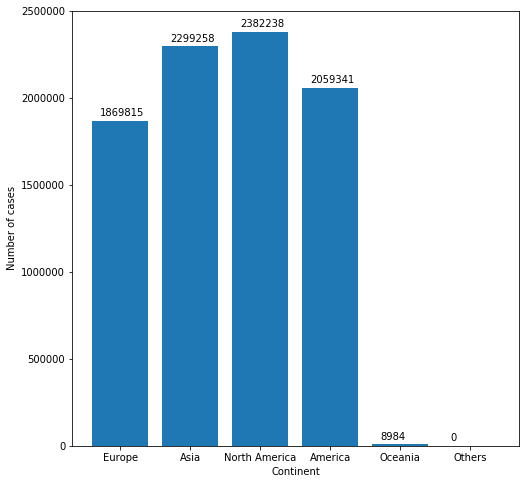

In [11]:
continents=["Europe","Asia","North America","America","Oceania","Others"]
cases=[asia.cases.sum(),europe.cases.sum(),north_america.cases.sum(),america.cases.sum(),oceania.cases.sum(),others.cases.sum()]
plt.figure(figsize=(8,8))

plt.bar(continents,cases)
plt.ylabel("Number of cases")
plt.xlabel('Continent')
for i, j in enumerate(cases):
        plt.text(i-0.29,j+25000,str(j))

Its important to note that China stopped reporting there numbers

Total number of people who were infected by the virus globally

In [12]:
totalcases=asia.cases.sum()+europe.cases.sum()+north_america.cases.sum()+america.cases.sum()+oceania.cases.sum()+others.cases.sum()
totalcases

8619636

Total number of deaths globally

In [13]:
totaldeaths=asia.deaths.sum()+america.deaths.sum()+oceania.deaths.sum()+others.deaths.sum()+europe.deaths.sum()+north_america.deaths.sum()
totaldeaths

460139

Global fatality rate

In [14]:
global_fatality_rate=totaldeaths/totalcases
global_fatality_rate

0.05338264864084748

Time series analysis of the spread of the pandemic

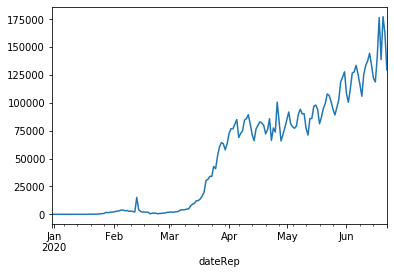

In [15]:
world.cases.resample('D').sum().plot()

Enter your country of choice to get all related stats

In [50]:
choice="India"


In [51]:
country=world[world.countriesAndTerritories==choice]
country.rename(columns={'countriesAndTerritories':'Country Name'},inplace=True)
country.head()

D:\Users\arjun\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,day,month,year,cases,deaths,Country Name,geoId,countryterritoryCode,popData2019,continentExp
dateRep,,,,,,,,,,
2020-06-22,22,6,2020,14821,445,India,IN,IND,1.366418e+09,Asia
2020-06-21,21,6,2020,15413,306,India,IN,IND,1.366418e+09,Asia
2020-06-20,20,6,2020,14516,375,India,IN,IND,1.366418e+09,Asia
2020-06-19,19,6,2020,13586,336,India,IN,IND,1.366418e+09,Asia
2020-06-18,18,6,2020,12881,334,India,IN,IND,1.366418e+09,Asia


Text(0, 0.5, 'cases')

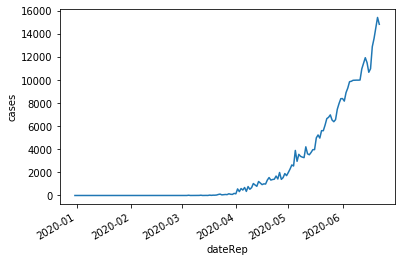

In [52]:
country.cases.plot()
plt.ylabel('cases')

Text(0, 0.5, 'Deaths')

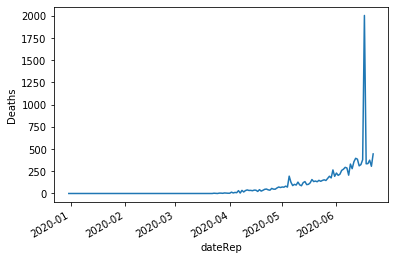

In [53]:
country.deaths.plot()
plt.ylabel('Deaths')

An interesting parameter to check would be to see if there is a relation between the wealth of a country and the sevirity of the pandemic in the nation 

In [54]:
country_total=world.groupby(['countriesAndTerritories']).cases.sum()
test=pd.DataFrame(country_total)
test.head()

,cases
countriesAndTerritories,
Afghanistan,28833
Albania,1927
Algeria,11771
Andorra,855
Angola,176


In [55]:
test.reset_index(drop=True,inplace=True)   #reset the index on test
country_total=pd.concat((pd.Series(country_total.index),test),axis=1)  
country_total.rename(columns={'countriesAndTerritories':'CountryName'},inplace=True)
gdp=pd.read_excel("GDP.xls")
gdp2018=pd.Series(gdp.iloc[:,-2])
countriesAndTerritories=pd.Series(gdp.iloc[:,0])
gdp=pd.concat((countriesAndTerritories,gdp2018),axis=1)
gdp.rename(columns={'Country Name':'CountryName'},inplace=True)
gdp=gdp.dropna()
newdata=pd.merge(country_total,gdp,on='CountryName',how='left')
newdata.rename(columns={'2018':'GDPpercapita'},inplace=True)
newdata=newdata.dropna()
newdata.head()

,CountryName,cases,GDPpercapita
0,Afghanistan,28833,2225.761336
1,Albania,1927,13835.548306
2,Algeria,11771,11759.196587
4,Angola,176,7092.990319
7,Argentina,42772,23299.982766


Text(0.5, 1.0, 'Plot of GDP per capita VS Total coronavirus cases')

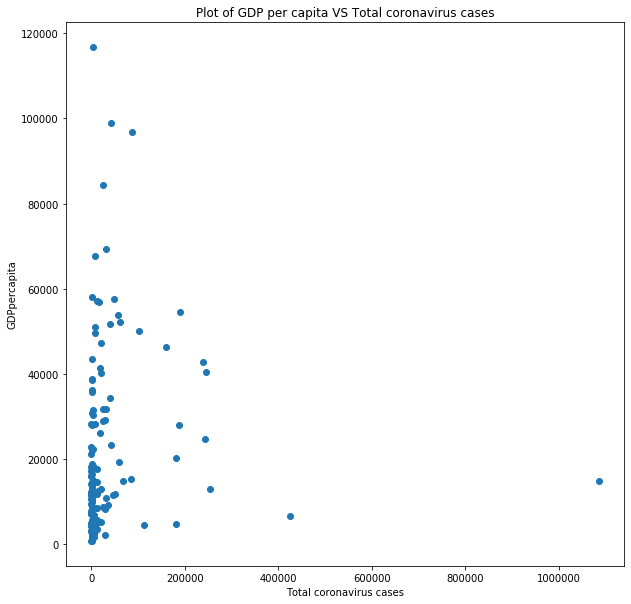

In [56]:
plt.figure(figsize=(10,10))
plt.scatter(newdata.cases,newdata.GDPpercapita)
plt.xlabel('Total coronavirus cases')
plt.ylabel('GDPpercapita')
plt.title('Plot of GDP per capita VS Total coronavirus cases')


Brazil and India (point beyond 1000000 and 400000 on the x axis respectively) are more sevely affected than others. Low GDP per capita of these countries is also not good as Brazil and India will have to battle the virus with limited resources. 

To proceed with our analysis and to get a better picture of the distribution globally, we get rid of the outliers(India and Brazil).

Text(0.5, 1.0, 'Plot of Total coronavirus cases vs GDP per capita ;excluding outliers')

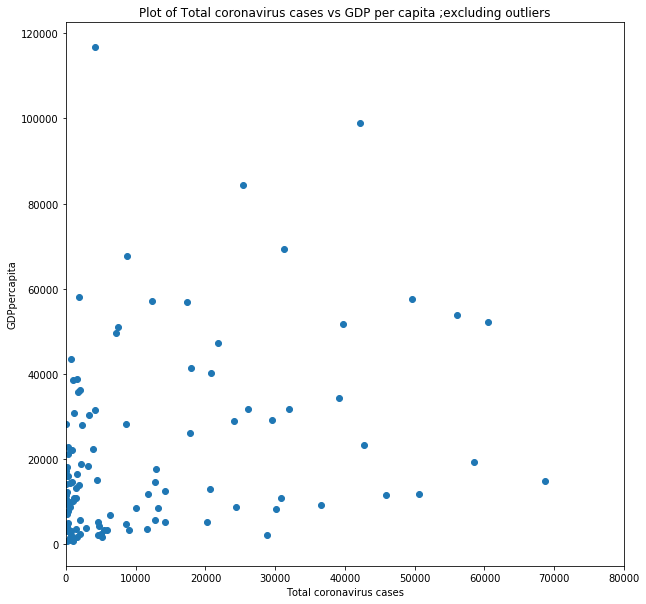

In [77]:
plt.figure(figsize=(10,10))
plt.scatter(newdata.cases,newdata.GDPpercapita)
plt.xlabel('Total coronavirus cases')
plt.ylabel('GDPpercapita')
plt.xlim(0,80000)

plt.title('Plot of Total coronavirus cases vs GDP per capita ;excluding outliers')

On first look, there is no evident relation between the total number of coronavirus cases and the GDP per capita of a country. But to get a better understanding of any possible relation, we will run a KMeans algorithm and look for possible non-obvious clusters

Conclusion that can be drawn from observing the above plot are as follows:

1. The cluster towards the origin and high number of points with low x-values suggest that many countries have managed to limit the spread of the virus and they include both poor and rich countries. The spread of dispersed plots suggest that contrary for some others.



These conclusions have been drawn based on data available as on 23/06/2020 and may become invalid as the situation matures.

In [80]:
newdata.sort_values('cases',ascending=False).head()


,CountryName,cases,GDPpercapita
27,Brazil,1085038,14951.803509
91,India,425282,6697.157798
151,Peru,254936,13093.748704
178,Spain,246272,40483.639213
40,Chile,242355,24763.002188


Since India and Brazil have unusually high number of cases, we will exclude these countries from our cluster analysis as they can skew the results

In [81]:
newdata1=newdata[newdata.CountryName!='Brazil']
newdata1=newdata1[newdata1.CountryName!='India']

In [82]:
kmeans = KMeans(n_clusters=3)
newdata1['label'] = kmeans.fit_predict(newdata1[['cases']])

In [83]:
newdata1.head()

,CountryName,cases,GDPpercapita,label
0,Afghanistan,28833,2225.761336,0
1,Albania,1927,13835.548306,0
2,Algeria,11771,11759.196587,0
4,Angola,176,7092.990319,0
7,Argentina,42772,23299.982766,2


In [84]:
cluster1=newdata1[newdata1.label==0]
cluster2=newdata1[newdata1.label==1]
cluster3=newdata1[newdata1.label==2]
cluster1.head()

,CountryName,cases,GDPpercapita,label
0,Afghanistan,28833,2225.761336,0
1,Albania,1927,13835.548306,0
2,Algeria,11771,11759.196587,0
4,Angola,176,7092.990319,0
8,Armenia,20588,13024.688289,0


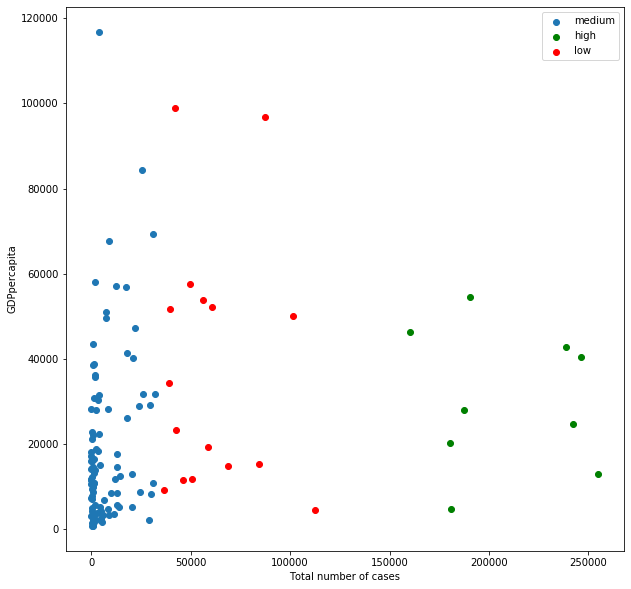

In [85]:
plt.figure(figsize=(10,10))
plt.scatter(cluster1.cases,cluster1.GDPpercapita,label='medium')            #cluster 1: medium case of spread
plt.scatter(cluster2.cases,cluster2.GDPpercapita,color='green',label='high') #cluster 2: high case of spread
plt.scatter(cluster3.cases,cluster3.GDPpercapita,color='red',label='low')    # cluster 3: low case of spread
plt.xlabel('Total number of cases')
plt.ylabel('GDPpercapita')
plt.legend()


We have split the data into three distinct clusters (segregated by the color of the points on the plot) based on the degree of the spread of the virus. We can draw the following conclusions from the plot.

1. High gdp countries ( gdppercapita > 60000 ) have been very sucessful in containing the virus

2. High number of cases of the virus is seen only in medium gdppercapita countries( 20000 < gdppercapita < 60000) and low gdppercapita countries( gdppercapita < 20000 ). Even among these nations, most have managed to contain the virus well. 

These observations point out that some countries have been more affected than others. This variance of spread among countries maybe because of multiple reasons, which includes but not limited to, lack of proper measures, high population density, lack of complaince of the general public with laws enforced etc. Although most factors listed above cannot be quantified, we can investigate if population denisity is a factor that contributed to this spread



In [88]:
popdense=pd.read_excel('Popdense.xls')
popdense=popdense.iloc[:,[0,62]]
popdense.head()

,Country Name,2018
0,Aruba,588.027778
1,Afghanistan,56.937760
2,Angola,24.713052
3,Albania,104.612263
4,Andorra,163.842553


In [89]:
popdense.rename(columns={'Country Name':'CountryName','2018':'Popdense'},inplace=True)


In [90]:
newdata2=pd.merge(newdata1,popdense,how='inner',on='CountryName')


Text(0, 0.5, 'Population denisity')

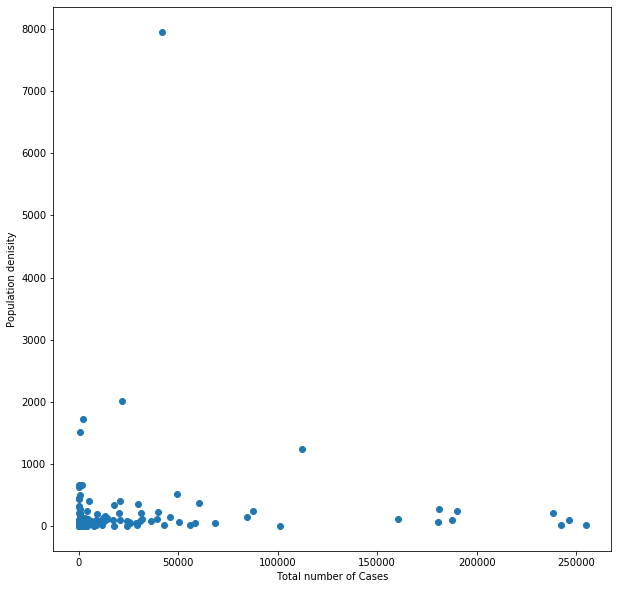

In [91]:
plt.figure(figsize=(10,10))
plt.scatter(newdata2.cases,newdata2.Popdense)
plt.xlabel('Total number of Cases')
plt.ylabel('Population denisity')

In [92]:
newdata2.sort_values('Popdense',ascending=False).head()

,CountryName,cases,GDPpercapita,label,Popdense
109,Singapore,42095,98827.352602,2,7952.998418
9,Bahrain,21764,47296.986953,0,2017.273700
76,Maldives,2203,18959.372998,0,1718.986667
78,Malta,665,43538.509928,0,1514.468750
10,Bangladesh,112306,4549.613928,2,1239.579312


It is interesting to note that Singapore, although it has a very high population denisity, has managed to do an excellent job in containing the virus.

To get a better picture of the relation, we exclude the outliers as before.

In [93]:
newdata2=newdata2[newdata2.CountryName!='Singapore']
newdata2=newdata2[newdata2.CountryName!='Brazil']
newdata2.head()

,CountryName,cases,GDPpercapita,label,Popdense
0,Afghanistan,28833,2225.761336,0,56.937760
1,Albania,1927,13835.548306,0,104.612263
2,Algeria,11771,11759.196587,0,17.730075
3,Angola,176,7092.990319,0,24.713052
4,Argentina,42772,23299.982766,2,16.258510


Text(0, 0.5, 'Population denisity')

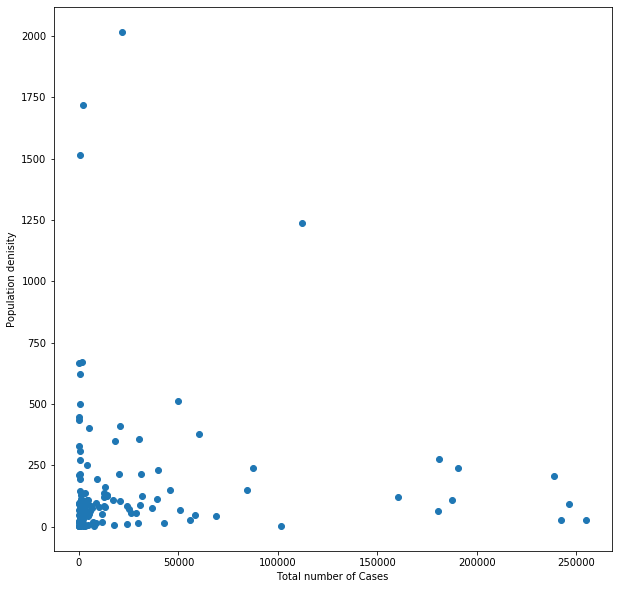

In [94]:
plt.figure(figsize=(10,10))
plt.scatter(newdata2.cases,newdata2.Popdense)
plt.xlabel('Total number of Cases')
plt.ylabel('Population denisity')

In [95]:
newdata2.sort_values('Popdense',ascending=False).head()


,CountryName,cases,GDPpercapita,label,Popdense
9,Bahrain,21764,47296.986953,0,2017.273700
76,Maldives,2203,18959.372998,0,1718.986667
78,Malta,665,43538.509928,0,1514.468750
10,Bangladesh,112306,4549.613928,2,1239.579312
67,Lebanon,1587,16416.891561,0,669.494135


In [96]:
popcluster1=newdata2[newdata2.label==0]
popcluster2=newdata2[newdata2.label==1]
popcluster3=newdata2[newdata2.label==2]

Text(0, 0.5, 'Population dense')

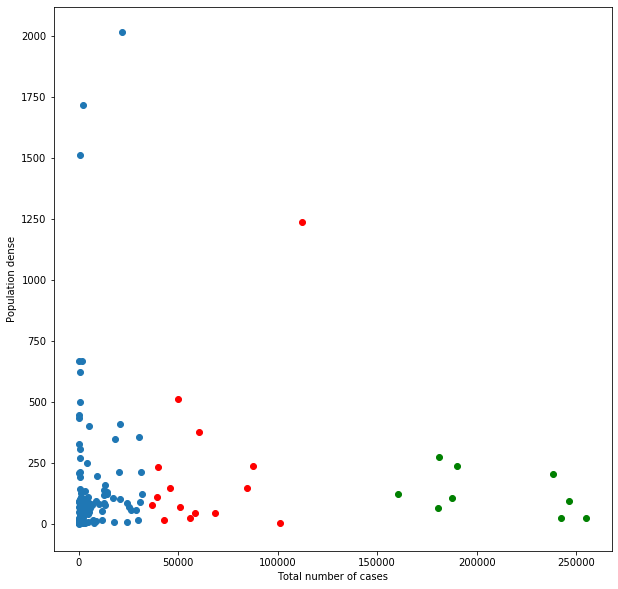

In [97]:
plt.figure(figsize=(10,10))
plt.scatter(popcluster1.cases,popcluster1.Popdense,)
plt.scatter(popcluster2.cases,popcluster2.Popdense,color='green')
plt.scatter(popcluster3.cases,popcluster3.Popdense,color='red')
plt.xlabel('Total number of cases')
plt.ylabel('Population dense')



We can draw the following conclusions from this plot:
1. There seems to be no percivable relation to the average population denisty of a nation and the actual spread of the data.
2. Certain countries with very high population denisity are doing very well compared to others .

No handles with labels found to put in legend.


Text(0, 0.5, 'Population dense')

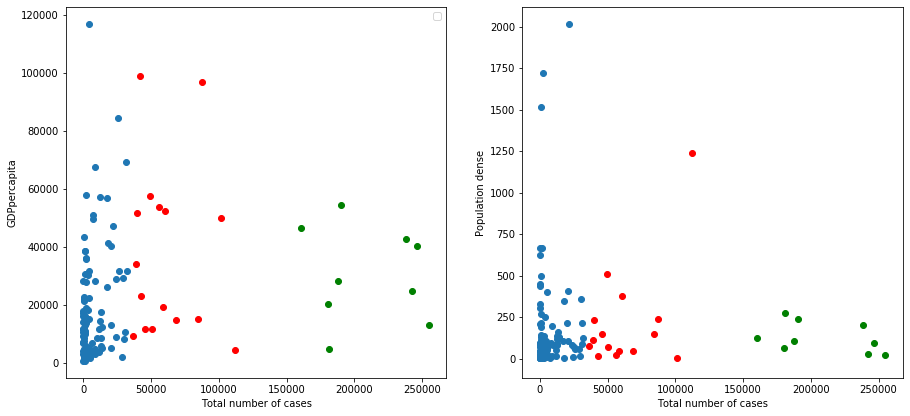

In [99]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)

plt.scatter(cluster1.cases,cluster1.GDPpercapita)            
plt.scatter(cluster2.cases,cluster2.GDPpercapita,color='green') 
plt.scatter(cluster3.cases,cluster3.GDPpercapita,color='red')    
plt.xlabel('Total number of cases')
plt.ylabel('GDPpercapita')
plt.legend()

plt.subplot(2,2,2)

plt.scatter(popcluster1.cases,popcluster1.Popdense,)
plt.scatter(popcluster2.cases,popcluster2.Popdense,color='green')
plt.scatter(popcluster3.cases,popcluster3.Popdense,color='red')
plt.xlabel('Total number of cases')
plt.ylabel('Population dense')




1. The countries with high number of cases have low to medium GDPpercapita (0 < gdpPercapita < 60000) and low to medium population denisty(0 < popdensity < 500). 
2. Many countries in low to medium GDPpercapita and nd low to medium population denisty have contained the spread effectively
3. Some countries with very high population denisity have been extremely effective in containing the spread.

These observations suggests that the virus had spread very drasticaly in some countries because they failed to implement preventive measures effectively in a timely fashion. A quick look the stats of India and Brazil also reveal the same trend.

These trends suggest that the only factor that can control the spread the virus is how effectively preventive measures(social distancing, quarantine of effected individuals at the earliest etc) is enforced in a nation. It is therefore the discipline of the people of a nation and effectiveness of policy implementation of the government that determines the state of the spread.


In [40]:
newdata3=pd.DataFrame()
newdata3=pd.concat([world.countriesAndTerritories,world.deaths,world.cases],axis=1)
newdata3.rename(columns={'countriesAndTerritories':'CountryName'},inplace=True)
totaldeath=pd.DataFrame(newdata3.groupby(['CountryName']).deaths.sum())
totaldeath.reset_index(drop=True,inplace=True)
totalcases=pd.DataFrame(newdata3.groupby(['CountryName']).cases.sum())
totalcases.reset_index(drop=True,inplace=True)
fatalityrate=pd.Series((totaldeath.deaths/totalcases.cases)*100)
deathrate=pd.concat([pd.Series(newdata2.CountryName.unique()),fatalityrate],axis=1)
deathrate.rename(columns={0:'CountryName',1:'FatalityRate'},inplace=1)
newdata3=pd.merge(deathrate,gdp,how='inner',on='CountryName')
newdata3.rename(columns={'2018':'gdppercapita'},inplace=True)
newdata3.head()

,CountryName,FatalityRate,gdppercapita
0,Afghanistan,2.015052,2225.761336
1,Albania,2.283342,13835.548306
2,Algeria,7.178659,11759.196587
3,Angola,6.081871,7092.990319
4,Argentina,5.113636,23299.982766


Text(0, 0.5, 'GDP per capita')

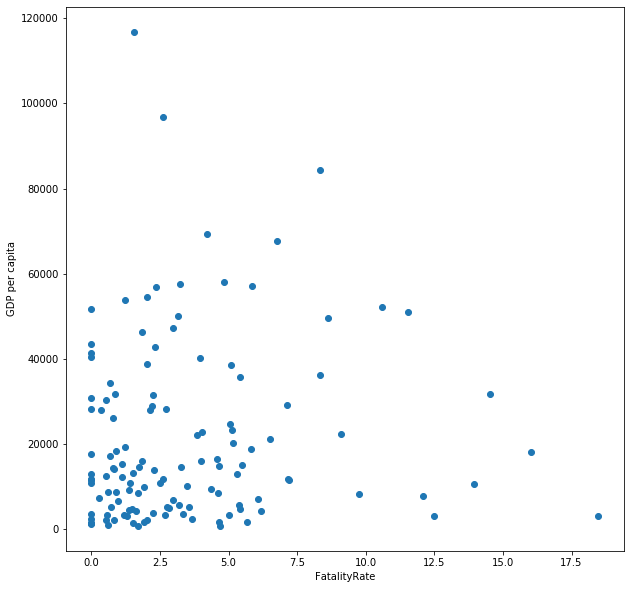

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(newdata3.FatalityRate,newdata3.gdppercapita)
plt.xlabel('FatalityRate')
plt.ylabel('GDP per capita')



In [42]:
kmeans=KMeans(n_clusters=3)
newdata3=pd.concat([newdata3,pd.Series(kmeans.fit_predict(newdata3[['FatalityRate']]))],axis=1)
newdata3.head()

,CountryName,FatalityRate,gdppercapita,0
0,Afghanistan,2.015052,2225.761336,0
1,Albania,2.283342,13835.548306,0
2,Algeria,7.178659,11759.196587,1
3,Angola,6.081871,7092.990319,1
4,Argentina,5.113636,23299.982766,1


In [43]:
newdata3.rename(columns={0:'label'},inplace=True)

In [44]:
dcluster1=newdata3[newdata3.label==0]
dcluster2=newdata3[newdata3.label==1]
dcluster3=newdata3[newdata3.label==2]

No handles with labels found to put in legend.


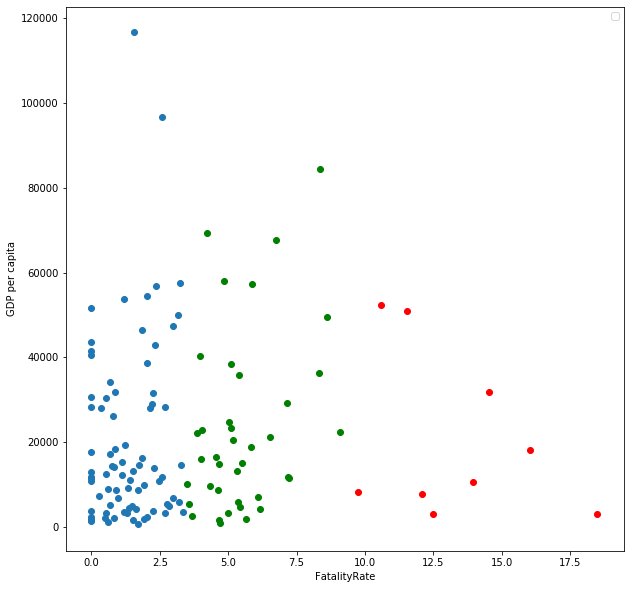

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(dcluster1.FatalityRate,dcluster1.gdppercapita)
plt.scatter(dcluster2.FatalityRate,dcluster2.gdppercapita,color='green')
plt.scatter(dcluster3.FatalityRate,dcluster3.gdppercapita,color='red')
plt.xlabel('FatalityRate')
plt.ylabel('GDP per capita')
plt.legend()


That concludes this analysis!!